In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, T5Tokenizer, T5ForConditionalGeneration
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
#model = GPT2LMHeadModel.from_pretrained("gpt2")
tokenizer = T5Tokenizer.from_pretrained('t5-base')
model = T5ForConditionalGeneration.from_pretrained('t5-base')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [ ]:
time_series = np.sin(np.linspace(0, 20, 100))  # Sine wave for illustration
time_series_str = " ".join([str(x) for x in time_series])
future_time_steps = np.linspace(20, 22, 10)  # Generate 10 future time steps
true_future_values = np.sin(future_time_steps)  # Calculate the true values for these time steps

print("True Future Values:", true_future_values)

True Future Values: [ 0.91294525  0.98043637  0.9997098   0.96981767  0.89223007  0.77076275
  0.61138945  0.42194812  0.21175545 -0.00885131]


Time-Series Values: [ 0.          0.20064886  0.39313661  0.56963411  0.72296256  0.84688556
  0.93636273  0.98775469  0.99897117  0.96955595  0.90070545  0.79522006
  0.65739025  0.49282204  0.30820902  0.11106004 -0.09060615 -0.28858706
 -0.47483011 -0.64176014 -0.7825875  -0.89158426 -0.96431712 -0.99782778
 -0.99075324 -0.94338126 -0.85763861 -0.73701276 -0.58640998 -0.41195583
 -0.22074597 -0.0205576   0.18046693  0.37415123  0.55261747  0.7086068
  0.83577457  0.92894843  0.98433866  0.99969234  0.97438499  0.90944594
  0.8075165   0.6727425   0.51060568  0.32770071  0.13146699 -0.07011396
 -0.26884313 -0.45663749 -0.62585878 -0.76962418 -0.88208623 -0.95867071
 -0.99626264 -0.99333304 -0.95000106 -0.86802917 -0.75075145 -0.60293801
 -0.43060093 -0.24074979 -0.0411065   0.16020873  0.35500771  0.53536727
  0.69395153  0.82431033  0.9211415   0.98050658  0.99999098  0.9788022
  0.91780205  0.81947165  0.68781042  0.5281735   0.34705389  0.15181837
 -0.04959214 -0.24898556 -0.43825

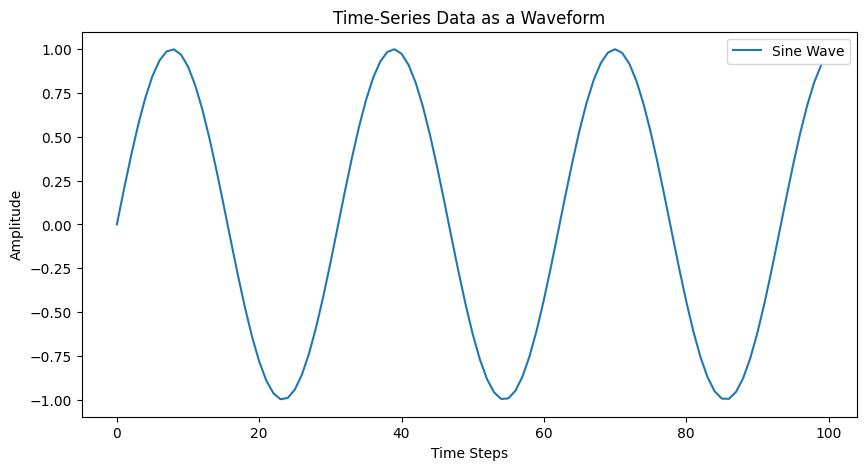

In [ ]:
print("Time-Series Values:", time_series)
plt.figure(figsize=(10, 5))
plt.plot(time_series, label="Sine Wave")
plt.title("Time-Series Data as a Waveform")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [ ]:
input_ids = tokenizer.encode(time_series_str, return_tensors="pt").to(device)
print("Input IDs (Tokenized Data):", input_ids)
print("Decoded Input Text:", tokenizer.decode(input_ids[0]))

Input IDs (Tokenized Data): tensor([[    3, 11739,  4097, 21196,  3707,  4433,  4122,  2884,  3651,  5062,
             3, 19997,  4271,  2368,  3539,  2122, 24748,  2668,  3916,     3,
         12100,  3951,  3891, 24175,  3951,  4018,  4314,  3436,     3, 22426,
          2884,  4314, 19337,  2534,  4440,  4448,  3076,  4097,  4608,  3651,
          4433,  4834, 19208,   357,  3916,  3710,     3, 23758,  3420,  3420,
          2555,  1828, 15442,  2577,  3707,     3, 23758, 27697,  5062,  3951,
          2773,  6007,   927,  3747,     3, 23758,  3916,  4327, 20275,  2517,
          2773,  2469,  3651,     3, 23758,  3951,  3769,  3390,  3647,  2606,
         23188,  4118,  4097,  7015,  2518,  5062,  4448,  1755,  3166, 28803,
          4097,  4440,  5373, 22594,  2518, 13427,  3647,   536,  4097,  4122,
          4552,  2394,  2266,  3539,  4613,  4013,  3769,     3, 22776,  4508,
          4613, 26363,  1828,  4060,  4508,  2469,     3, 19997,  4018,  1755,
          2394, 27693,  

In [ ]:
tokenizer.pad_token = tokenizer.eos_token
attention_mask = torch.ones(input_ids.shape, device=device)

In [ ]:
max_length = input_ids.shape[1] + 10  # Predict 10 additional time steps
output = model.generate(
    input_ids,
    max_length=max_length,
    do_sample=True,
    top_k=50,
    pad_token_id=tokenizer.eos_token_id,
    attention_mask=attention_mask
)

In [ ]:
predicted_text = tokenizer.decode(output[0], skip_special_tokens=True)
predicted_values = predicted_text.split(" ")[-10:]  # Last 10 values are predictions
predicted_values = [float(value) for value in predicted_values]
print("Predicted future values:", predicted_values)

Predicted future values: [-0.67646598826865, -0.347190424899996, -0.5171819905774825, -0.1251819019088111, -0.7576518547174744, -0.22945557747935647, -0.24959268429243, -0.10989938429298501, -0.8780528464629855, -0.2]


In [ ]:
mae = mean_absolute_error(true_future_values, predicted_values)
rmse = np.sqrt(mean_squared_error(true_future_values, predicted_values))

print("True Future Values:", true_future_values)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

True Future Values: [ 0.91294525  0.98043637  0.9997098   0.96981767  0.89223007  0.77076275
  0.61138945  0.42194812  0.21175545 -0.00885131]
Mean Absolute Error (MAE): 1.0852816266193464
Root Mean Squared Error (RMSE): 1.1730185317139787


In [ ]:
mape = np.mean(np.abs((true_future_values - predicted_values) / true_future_values)) * 100

# Print the MAPE as percentage
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

Mean Absolute Percentage Error (MAPE): 382.99%
